# Project: Investigate a Dataset of No-Show Appointments (in Brazil)

* Name: Jhonatan Nagasako
* Date: 22-FEB-2021
* Purpose: Udacity - Project 2
    * Investigate a dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes' if they did not show up

**Questions that will be addressed:**
1. What factors are imporant for us to know in order to predict if a patient will show up for their scheduled appointment?
        a. SCHOLARSHP vs SMS text?
        b. What illness contributes the greatest affect to no-shows?

**Independent variables - Inputs**
1. Scholarship (boolean)
2. SMS Text message (boolean)
3. Type of Illness (boolean)

**Dependent variable - Output**
1. Will patient be a No-show? (boolean)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm;


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
    
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Any missing information? NO
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# duplicate PatientId information? Yes, so lets take a closer look and assess quickly for this exploration phase
# duplicateRowsPatientId = df.duplicated(subset=['PatientId'])

duplicateRowsPatientId = df[df.duplicated(['PatientId'])]
duplicateRowsPatientId.sort_values('PatientId')

#df.describe()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
88585,2.263866e+07,5715081,F,2016-05-18T13:37:12Z,2016-06-08T00:00:00Z,23,INHANGUETÁ,0,0,0,0,0,1,No
83628,5.216894e+07,5704816,F,2016-05-16T16:42:19Z,2016-05-16T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No
11009,6.485121e+07,5683383,F,2016-05-11T07:28:23Z,2016-05-13T00:00:00Z,29,MARUÍPE,0,0,0,0,0,0,Yes
89371,7.922850e+07,5743266,F,2016-05-30T08:51:07Z,2016-06-08T00:00:00Z,21,NOVA PALESTINA,0,0,0,0,0,1,No
105577,8.799645e+07,5786272,M,2016-06-08T08:12:09Z,2016-06-08T00:00:00Z,3,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88851,9.998774e+14,5777078,M,2016-06-06T12:56:18Z,2016-06-06T00:00:00Z,13,SANTO ANTÔNIO,0,0,0,0,0,0,No
32033,9.999320e+14,5736368,M,2016-05-25T08:14:58Z,2016-05-25T00:00:00Z,90,JABOUR,0,0,0,0,0,0,No
104616,9.999320e+14,5772701,M,2016-06-03T16:04:03Z,2016-06-07T00:00:00Z,90,JABOUR,0,0,0,0,0,1,No
62194,9.999320e+14,5616762,M,2016-04-25T14:46:41Z,2016-05-04T00:00:00Z,90,JABOUR,0,0,0,0,0,1,No


### **QUALITY**
1. Assess and remove duplicated ```PatientId``` values

### **TIDINESS**
1. Headers need to be updated
        a. `Hipertension` change to `Hypertension`
        b. `Handcap` change to `Handicap`
2. Convert variables Yes/No (or Male/Female) to 1/0, respectively
        a. `No-show`
        b. `Gender`


### Data Cleaning (Replace this with more specific notes!)

#### Data Structure Review
There are quality improvements that are needed for this dataset. Specifically addressing the duplicate information in the ```PatientId``` column. After review, this duplicate information will be removed because of scope of this project. The focus will be on 1st time offenders (if any) that resulted with the "no-show" to their appoints--based on the independent variables mentioned above.

##### **QUALITY - CLEANING**
1. Assess and remove duplicated ```PatientId``` values



In [5]:
# drop duplicate values of PatientId and assign to df_clean

# before cleaning
duplicateRowsPatientId = df[df.duplicated(['PatientId'])]

# sort by PatientId
duplicateRowsPatientId = duplicateRowsPatientId.sort_values('PatientId')
duplicateRowsPatientId.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
88585,22638656.0,5715081,F,2016-05-18T13:37:12Z,2016-06-08T00:00:00Z,23,INHANGUETÁ,0,0,0,0,0,1,No
83628,52168938.0,5704816,F,2016-05-16T16:42:19Z,2016-05-16T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,0,No
11009,64851211.0,5683383,F,2016-05-11T07:28:23Z,2016-05-13T00:00:00Z,29,MARUÍPE,0,0,0,0,0,0,Yes
89371,79228495.0,5743266,F,2016-05-30T08:51:07Z,2016-06-08T00:00:00Z,21,NOVA PALESTINA,0,0,0,0,0,1,No
105577,87996454.0,5786272,M,2016-06-08T08:12:09Z,2016-06-08T00:00:00Z,3,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No


In [6]:
# after cleaning - not that we do NOT want to keep last occurrences--only the first occurrences for this project scope
df_clean = df.drop_duplicates(subset=['PatientId'])
df_clean.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#Confirmation that dataset is still operational -- no excessive lost of information
# Review the number of unique PatientId in original list
print('The number of unique PatientID =', df.PatientId.nunique())

# Review number of entries in PatientID - before cleaning
print('The number of entires in the original dataset (before cleaning) =', len(df.index))

# Review number of entries in PatientID - AFTER cleaning
print('The number of entires in the original dataset (before cleaning) =', len(df_clean.index))

The number of unique PatientID = 62299
The number of entires in the original dataset (before cleaning) = 110527
The number of entires in the original dataset (before cleaning) = 62299


##### **TIDINESS - CLEANING**
1. Headers need to be updated
        a. `Hipertension` change to `Hypertension`
        b. `Handcap` change to `Handicap`
2. Convert variables Yes/No (or Male/Female) to 1/0, respectively
        a. `No-show`
        b. `Gender`

In [8]:
# Clean dataset review - before column header changes
df_clean.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
# after change
df_clean = df.rename({"Hipertension":"Hypertension","Handcap":"Handicap"}, axis='columns') 
df_clean.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
# Convert No-show variables Yes/No to 1/0, respectively

# Check number of Yes/No - before cleaning
print('The number of Yes/No before cleaning: ')
df_clean['No-show'].value_counts()

The number of Yes/No before cleaning: 


No     88208
Yes    22319
Name: No-show, dtype: int64

In [11]:
df_clean['No-show'] = df_clean['No-show'].map(dict(Yes=1, No=0))

print('The number of Yes/No AFTER cleaning (Yes/No mapped to 1/0): ')
df_clean['No-show'].value_counts()


The number of Yes/No AFTER cleaning (Yes/No mapped to 1/0): 


0    88208
1    22319
Name: No-show, dtype: int64

In [12]:
df_clean['Gender'] = df_clean['Gender'].map(dict(M=1, F=0))

print('The number of Yes/No AFTER cleaning (Yes/No mapped to 1/0): ')
df_clean['Gender'].value_counts()

The number of Yes/No AFTER cleaning (Yes/No mapped to 1/0): 


0    71840
1    38687
Name: Gender, dtype: int64

In [13]:
df_clean.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
37459,3.311922e+13,5656940,1,2016-05-04T08:45:42Z,2016-05-04T00:00:00Z,68,JESUS DE NAZARETH,0,1,1,0,0,0,0
81964,8.915148e+12,5725031,0,2016-05-20T10:28:20Z,2016-05-24T00:00:00Z,47,ITARARÉ,0,1,1,0,0,0,0
68656,1.351563e+12,5646586,0,2016-05-02T11:30:41Z,2016-05-10T00:00:00Z,11,CRUZAMENTO,0,0,0,0,0,1,0
88823,7.246926e+13,5666274,1,2016-05-05T16:19:08Z,2016-06-07T00:00:00Z,45,SANTA TEREZA,0,0,0,0,0,1,0
43838,1.781574e+14,5634236,0,2016-04-28T10:37:06Z,2016-05-05T00:00:00Z,35,SÃO BENEDITO,1,0,0,1,0,1,1
8621,9.963340e+13,5690608,1,2016-05-12T10:22:04Z,2016-05-17T00:00:00Z,35,DA PENHA,0,0,0,0,0,0,1
108358,6.462373e+13,5762127,0,2016-06-02T07:24:20Z,2016-06-08T00:00:00Z,56,ROMÃO,0,0,0,0,0,1,0
44375,8.564219e+13,5616407,0,2016-04-25T14:07:26Z,2016-05-04T00:00:00Z,27,ILHA DE SANTA MARIA,0,0,0,0,0,1,0
80870,8.677125e+11,5599632,0,2016-04-19T09:13:15Z,2016-05-30T00:00:00Z,37,BONFIM,1,0,0,0,0,1,0
48472,5.212758e+12,5743446,0,2016-05-30T09:01:34Z,2016-05-30T00:00:00Z,65,JARDIM DA PENHA,0,1,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis
   
**Questions that will be addressed:**
1. What factors are imporant for us to know in order to predict if a patient will show up for their scheduled appointment?
        a. SCHOLARSHP vs SMS text?
        b. What illness contributes the greatest affect to no-shows?

**Independent variables - Inputs**
1. Scholarship (boolean)
2. SMS Text message (boolean)
3. Types of Illness (boolean), checking every condition

**Dependent variable - Output**
1. Will patient be a No-show? (boolean) 


### Research Question 1: How does scholarship affect the no-show probability?


In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# checkout data using scatter_matrix
# pd.plotting.scatter_matrix(df_clean);

In [15]:
df_clean.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [16]:
# strip dataset of extranious information, focus on illness, gender, age, text message (SMS), and No-show condition

df = df_clean.filter(items=['PatientId', 'AppointmentID', 'Gender', 'Age', 'Scholarship', 
                                   'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'])

# do not convert the PatientId from float to int, it will error out because numbers are very big
# df['PatientId'] = df['PatientId'].astype(int)
df.sample(5)


,PatientId,AppointmentID,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
9211,5.185769e+12,5729736,0,27,0,0,0,0,0,1,0
22822,3.478557e+13,5689231,0,41,0,0,0,0,0,0,0
75547,5.373321e+12,5748488,0,69,0,1,0,0,0,0,0
69515,7.123482e+12,5656091,0,32,0,1,0,0,0,1,1
68793,2.283239e+13,5606403,0,15,0,0,0,0,0,1,1


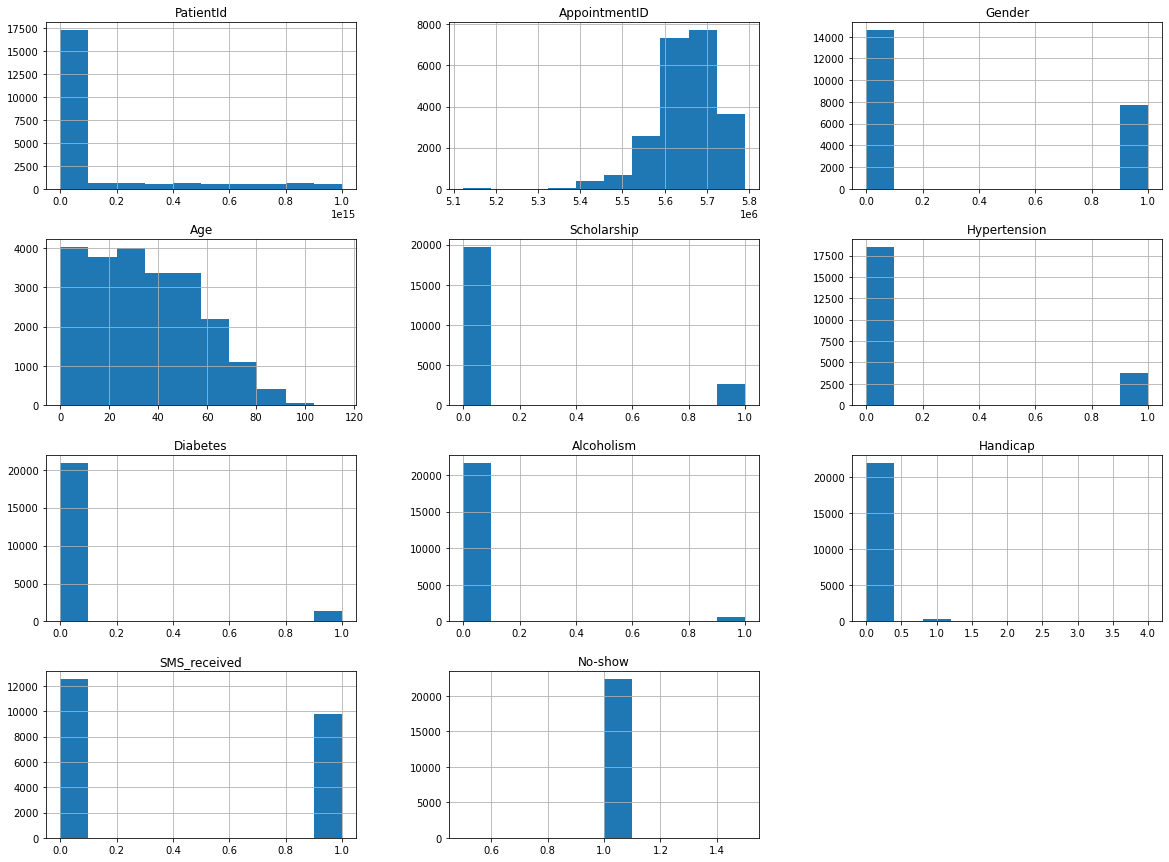

In [17]:
# fiter dataset to only show people that did NOT show up to appointment

df_noShow = df.loc[df['No-show'] == 1]
df_noShow.hist(figsize=(20,15));


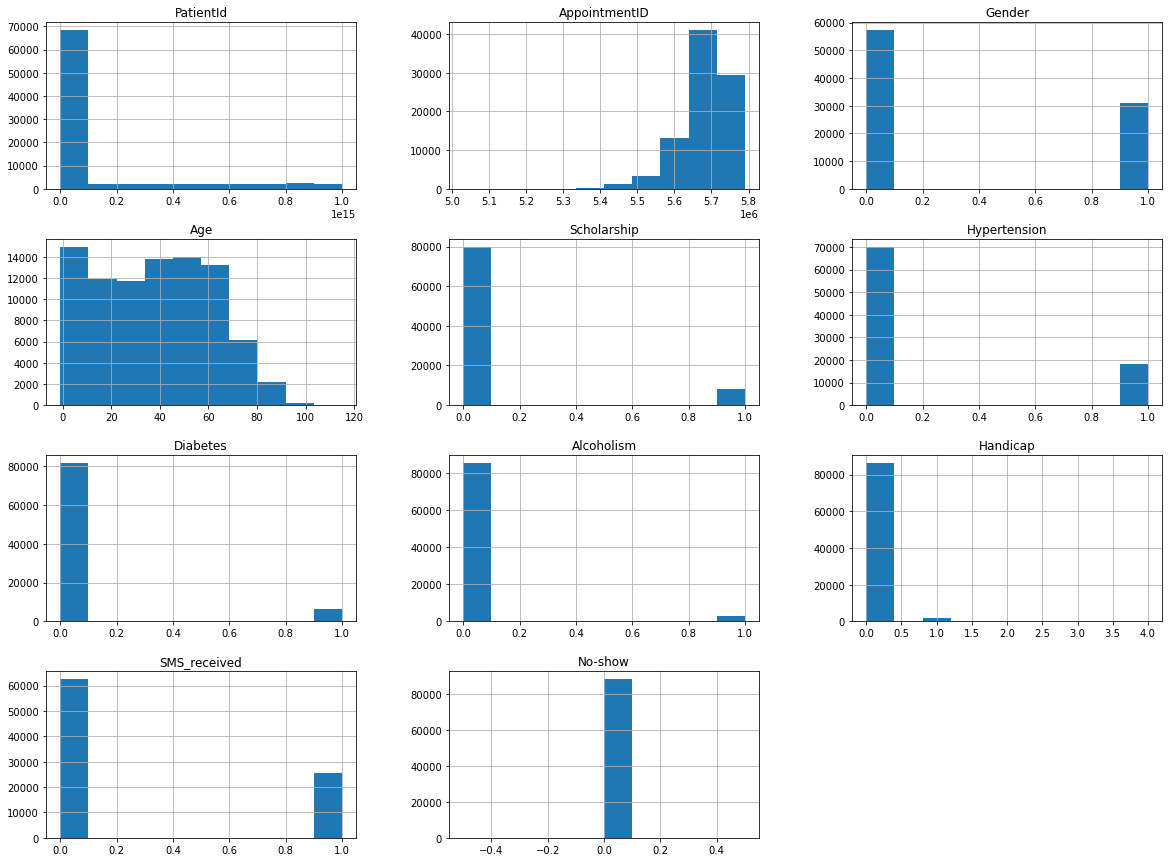

In [18]:
# fiter dataset to only show people that did show up to appointment
df_show = df.loc[df['No-show'] == 0]
df_show.hist(figsize=(20,15));

Probability of **No-show** based on **Scholarship** review

In [19]:
test = df_noShow.groupby(['Scholarship'])['No-show'].count()
test

Scholarship
0    19741
1     2578
Name: No-show, dtype: int64

In [20]:
df_noShow['Scholarship'].value_counts()
a = df_noShow.query("Scholarship == 1")['Scholarship'].sum()
b = len(df_noShow) - a

print('Probability of patient MISSING their appointment based on NO SCHOLARSHIP = ', '{0:.2%}'.format(a/b))

# santity test for No-Show dataframe, to ensure that calculation method with variables a and b is correct
assert a == 2578
assert b == 19741

Probability of patient MISSING their appointment based on NO SCHOLARSHIP =  13.06%


In [21]:
test1 = df_show.groupby(['Scholarship'])['No-show'].count()
test1

Scholarship
0    79925
1     8283
Name: No-show, dtype: int64

In [22]:
df_show['Scholarship'].value_counts()
a = df_show.query("Scholarship == 1")['Scholarship'].sum()
b = len(df_show) - a

print('Probability of patient *MAKING* their appointment based on SCHOLARSHIP = ', '{0:.2%}'.format(a/b))

# santity test for No-Show dataframe, to ensure that calculation method with variables a and b is correct
assert a == 8283
assert b == 79925

Probability of patient *MAKING* their appointment based on SCHOLARSHIP =  10.36%


#### There appears to be a be difference in the probability of of *No-show* appointments when considering if a patient *is or is NOT* on *Scholarship* by about 3%

#### How about SMS text messages?

In [23]:
test2 = df_noShow.groupby(['SMS_received'])['No-show'].count()
test2

SMS_received
0    12535
1     9784
Name: No-show, dtype: int64

In [24]:
df_noShow['SMS_received'].value_counts()
a = df_noShow.query("SMS_received == 1")['SMS_received'].sum()
b = len(df_noShow) - a

print('Probability of patient MISSING their appointment based on NO SMS_received = ', '{0:.2%}'.format(a/b))

# santity test for No-Show dataframe, to ensure that calculation method with variables a and b is correct
assert a == 9784
assert b == 12535

Probability of patient MISSING their appointment based on NO SMS_received =  78.05%


In [25]:
test3 = df_show.groupby(['SMS_received'])['No-show'].count()
test3

SMS_received
0    62510
1    25698
Name: No-show, dtype: int64

In [26]:
df_show['SMS_received'].value_counts()
a = df_show.query("SMS_received == 1")['SMS_received'].sum()
b = len(df_show) - a

print('Probability of patient *MAKING* their appointment based on SMS_received = ', '{0:.2%}'.format(a/b))

# santity test for No-Show dataframe, to ensure that calculation method with variables a and b is correct
assert a == 25698
assert b == 62510

Probability of patient *MAKING* their appointment based on SMS_received =  41.11%


There appears to be a be difference in the probability of of **No-show** appointments when considering if a patient *is or is NOT* on **SMS_received** by about 37%!


### Research Question 2  - What illness contributes the greatest affect on "No-show" appointments?

In [27]:
# multiple linear regression
df['intercept'] = 1
lm = sm.OLS(df['No-show'], df[['intercept', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'Scholarship', 'SMS_received']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                No-show   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     338.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:47:04   Log-Likelihood:                -54948.
No. Observations:              110527   AIC:                         1.099e+05
Df Residuals:                  110520   BIC:                         1.100e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.1698      0.002    103.539      0.000       0.167       0.173
Hypertension    -0.0364      0.003    -10.839      0.000      -0.043      -0.030
Diabetes         0.0045      0.005      0.871      0.384      -0.006       0.015
Alcoholism       0.0123      0.007      1.749      0.080      -0.001       0.026
Handicap        -0.0002      0.007     -0.028      0.977      -0.015       0.014
Scholarship      0.0380      0.004      9.437      0.000       0.030       0.046
SMS_received     0.1086      0.003     42.357      0.000       0.104       0.114
==============================================================================
Omnibus:                    22133.453   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38807.401
Skew:                           1.448   Prob(JB):                         0.00
Kurtosis:                       3.211   Cond. No.                         6.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# just focus on the illnesses
# multiple linear regression
df['intercept'] = 1
lm = sm.OLS(df['No-show'], df[['intercept', 'Diabetes', 'Handicap']])
results = lm.fit()
results.summary()

# intercept is  'Hypertension'
# remove 'Alcoholism' because it has lot statitical p value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                No-show   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.24
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           6.56e-07
Time:                        18:47:04   Log-Likelihood:                -55940.
No. Observations:              110527   AIC:                         1.119e+05
Df Residuals:                  110524   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2039      0.001    161.575      0.000       0.201       0.206
Diabetes      -0.0231      0.005     -4.939      0.000      -0.032      -0.014
Handicap      -0.0130      0.007     -1.733      0.083      -0.028       0.002
==============================================================================
Omnibus:                    22850.611   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40782.497
Skew:                           1.484   Prob(JB):                         0.00
Kurtosis:                       3.205   Cond. No.                         6.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### It appears that 'Hypertension' and 'Diabetes' contribute the greatest affect on 'No-show' appointments--when compared to 'Handicap' and 'Alcoholism'.

#### Let's verify those percentages below:

In [29]:
df_noShow['Hypertension'].value_counts()
a = df_noShow.query("Hypertension == 1")['Hypertension'].sum()
b = len(df_noShow) - a

print('Probability of patient MISSING their appointment based on NO SMS_received = ', '{0:.2%}'.format(a/b))

df_show['Hypertension'].value_counts()
a = df_show.query("Hypertension == 1")['Hypertension'].sum()
b = len(df_show) - a

print('Probability of patient *MAKING* their appointment based on SMS_received = ', '{0:.2%}'.format(a/b))

Probability of patient MISSING their appointment based on NO SMS_received =  20.34%
Probability of patient *MAKING* their appointment based on SMS_received =  25.69%


In [30]:
df_noShow['Diabetes'].value_counts()
a = df_noShow.query("Diabetes == 1")['Diabetes'].sum()
b = len(df_noShow) - a

print('Probability of patient MISSING their appointment based on NO SMS_received = ', '{0:.2%}'.format(a/b))

df_show['Diabetes'].value_counts()
a = df_show.query("Diabetes == 1")['Diabetes'].sum()
b = len(df_show) - a

print('Probability of patient *MAKING* their appointment based on SMS_received = ', '{0:.2%}'.format(a/b))

Probability of patient MISSING their appointment based on NO SMS_received =  6.85%
Probability of patient *MAKING* their appointment based on SMS_received =  7.97%


In [31]:
df_noShow['Handicap'].value_counts()
a = df_noShow.query("Handicap == 1")['Handicap'].sum()
b = len(df_noShow) - a

print('Probability of patient MISSING their appointment based on NO SMS_received = ', '{0:.2%}'.format(a/b))

df_show['Handicap'].value_counts()
a = df_show.query("Handicap == 1")['Handicap'].sum()
b = len(df_show) - a

print('Probability of patient *MAKING* their appointment based on SMS_received = ', '{0:.2%}'.format(a/b))

Probability of patient MISSING their appointment based on NO SMS_received =  1.67%
Probability of patient *MAKING* their appointment based on SMS_received =  1.94%


In [32]:
df_noShow['Alcoholism'].value_counts()
a = df_noShow.query("Alcoholism == 1")['Alcoholism'].sum()
b = len(df_noShow) - a

print('Probability of patient MISSING their appointment based on NO SMS_received = ', '{0:.2%}'.format(a/b))

df_show['Alcoholism'].value_counts()
a = df_show.query("Alcoholism == 1")['Alcoholism'].sum()
b = len(df_show) - a

print('Probability of patient *MAKING* their appointment based on SMS_received = ', '{0:.2%}'.format(a/b))

Probability of patient MISSING their appointment based on NO SMS_received =  3.13%
Probability of patient *MAKING* their appointment based on SMS_received =  3.14%


<a id='conclusions'></a>
## Conclusions

Results indicate a notable affect with SMS text being sent to patient in determine if a patient is a 'No-show' when compared to other factors. The patient is almost 78% more likely to NOT make their appointment if a SMS text reminder is NOT sent.

Analysis of the various illnesses, pateints with 'Hypertension' tend to NOT make their appointment when compared to the other three illnesses. 

Limitations considered for this analysis: study did not consider age of the patient or location.
